# Understand Your Data With Visualization


The first step in any ML/DS project is to fully understand your data. The fastest way to do it is by investigating the **basic descriptive statistics** of your dataset and **visualize your data**!

In this short tutorial you will discover some visualization techniques in Python using Pandas:

1. Univariate plots
    - Histograms
    - Density plots
    - Box plots
2. Multivariate plots
    - Correlation Matrix Plot
    - Scatter Plot Matrix

To follow the tutorial, you can download the data from Kaggle: [Pima Indians Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

You can check the [previous notebook on data descriptive statistics](https://github.com/Data-Centric-AI-Community/awesome-python-for-data-science/blob/main/tutorials/data_descriptive_statistics.ipynb) to learn more about the data first!

## 1. Univariate plots

Let's look at three techniques that you can use to understand each attribute of your dataset:

- Histograms
- Density Plots
- Box Plots


### Histograms

A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers. We will use the [matplotlib package](https://matplotlib.org/2.0.2/index.html) to showcase it:

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Load your data
data = pd.read_csv("data/diabetes.csv")

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

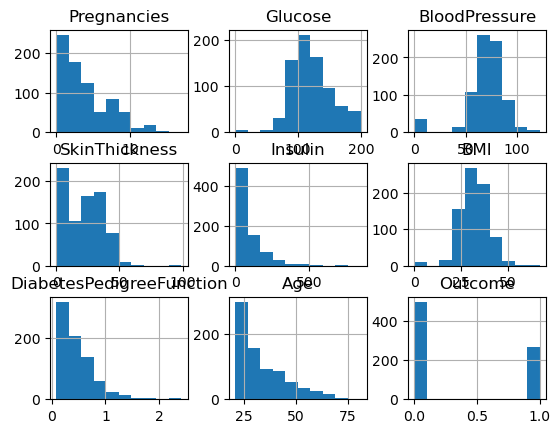

In [17]:
data.hist()

We can see that perhaps the attributes **age**, **DiabetesPedigreeFunction** and **Insulin** may have an **exponential distribution**.

We can also see that perhaps the **BMI** and **BloodPressure** and **Glucose** attributes may have a **Gaussian or nearly Gaussian** distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

## Density Plots

Density plots are another way of getting a quick idea of the distribution of each attribute. The plots look like an abstracted histogram with a smooth curve drawn through the top of each bin, much like your eye tried to do with the histograms.

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

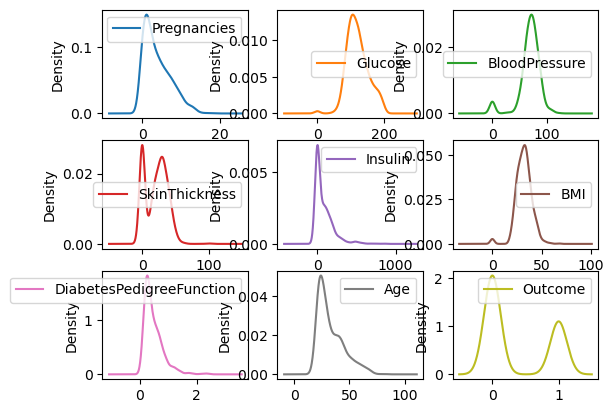

In [27]:
# Univariate Density Plots
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)

In the code `data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)`, the parameter `sharex=False` means that each subplot on the x-axis will have its own independent scale.

When `sharex` is set to `True`, all subplots share the same x-axis scale, which means that the x-axis limits will be the same across all subplots. This is useful when comparing data on the same scale and allows you to easily see the relative differences between different subplots.

However, when `sharex` is set to `False`, each subplot will have its own unique x-axis scale, which means that the x-axis limits will be determined independently for each subplot based on the data within that subplot. This is useful when you have data with significantly different ranges or distributions in different subplots.

We can see the distribution for each attribute is clearer than the histograms.

## Box Plots

Another useful way to review the distribution of each attribute is to use Box and Whisker Plots or boxplots for short. Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

Pregnancies                    Axes(0.125,0.653529;0.227941x0.226471)
Glucose                     Axes(0.398529,0.653529;0.227941x0.226471)
BloodPressure               Axes(0.672059,0.653529;0.227941x0.226471)
SkinThickness                  Axes(0.125,0.381765;0.227941x0.226471)
Insulin                     Axes(0.398529,0.381765;0.227941x0.226471)
BMI                         Axes(0.672059,0.381765;0.227941x0.226471)
DiabetesPedigreeFunction           Axes(0.125,0.11;0.227941x0.226471)
Age                             Axes(0.398529,0.11;0.227941x0.226471)
Outcome                         Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

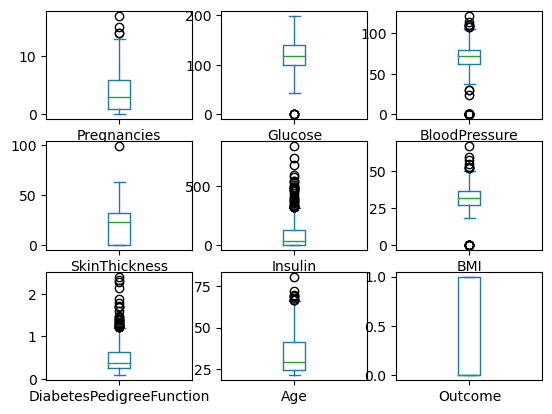

In [29]:
# Box and Whisker Plots
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

We can see that the spread of attributes is quite different. Some like Age, Insulin and SkinThickness
appear quite skewed towards smaller values.

## 2. Multivariate Plots

Let's explore examples of two plots that show the interactions between multiple variables in your dataset:

- Correlation Matrix Plot
- Scatter Plot Matrix

## Correlation Matrix Plot

Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If they change in opposite directions together (one goes up, one goes down), then they are negatively correlated. You can calculate the correlation between each pair of attributes. This is called a correlation matrix. You can then plot the correlation matrix and get an idea of which variables have a high correlation with each other. This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.

[Text(0, 0, 'Pregnancies'),
 Text(0, 1, 'Glucose'),
 Text(0, 2, 'BloodPressure'),
 Text(0, 3, 'SkinThickness'),
 Text(0, 4, 'Insulin'),
 Text(0, 5, 'BMI'),
 Text(0, 6, 'DiabetesPedigreeFunction'),
 Text(0, 7, 'Age'),
 Text(0, 8, 'Outcome')]

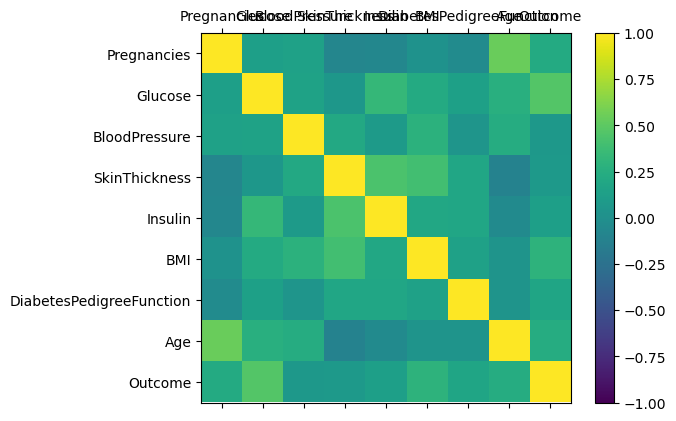

In [35]:
import numpy as np

# Correction Matrix Plot
correlations = data.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)

Maybe we can adjust the names to make the figure more clear?

In [36]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [38]:
feature_names = ['Preg', 'Glu', 'Blood', 'Skin', 'Ins','BMI', 'Pedi', 'Age', 'Class']

[Text(0, 0, 'Preg'),
 Text(0, 1, 'Glu'),
 Text(0, 2, 'Blood'),
 Text(0, 3, 'Skin'),
 Text(0, 4, 'Ins'),
 Text(0, 5, 'BMI'),
 Text(0, 6, 'Pedi'),
 Text(0, 7, 'Age'),
 Text(0, 8, 'Class')]

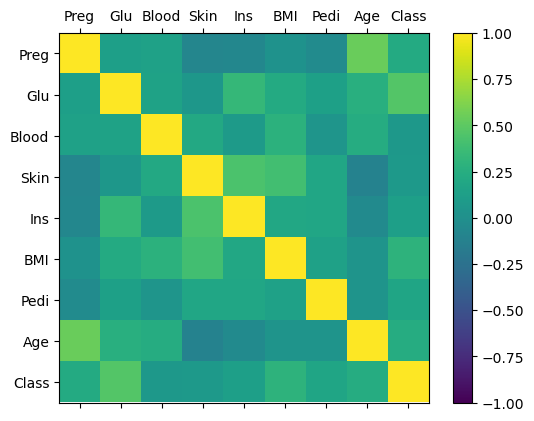

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(feature_names)
ax.set_yticklabels(feature_names)

Better!

We can see that the matrix is symmetrical, i.e. the bottom left of the matrix is the same as the top right. This is useful as we can see two different views on the same data in one plot. We can also see that each variable is perfectly positively correlated with itself in the diagonal line from top left to bottom right.

## Scatter Plot Matrix

A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatter plot for each pair of attributes in your data. Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

In this case we will leverage the [searborn package](https://seaborn.pydata.org), which is also very popular in data science. Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. It integrates seamlessly with pandas data structures, making it a popular choice for visualizing data in Python.

In [42]:
import seaborn as sns

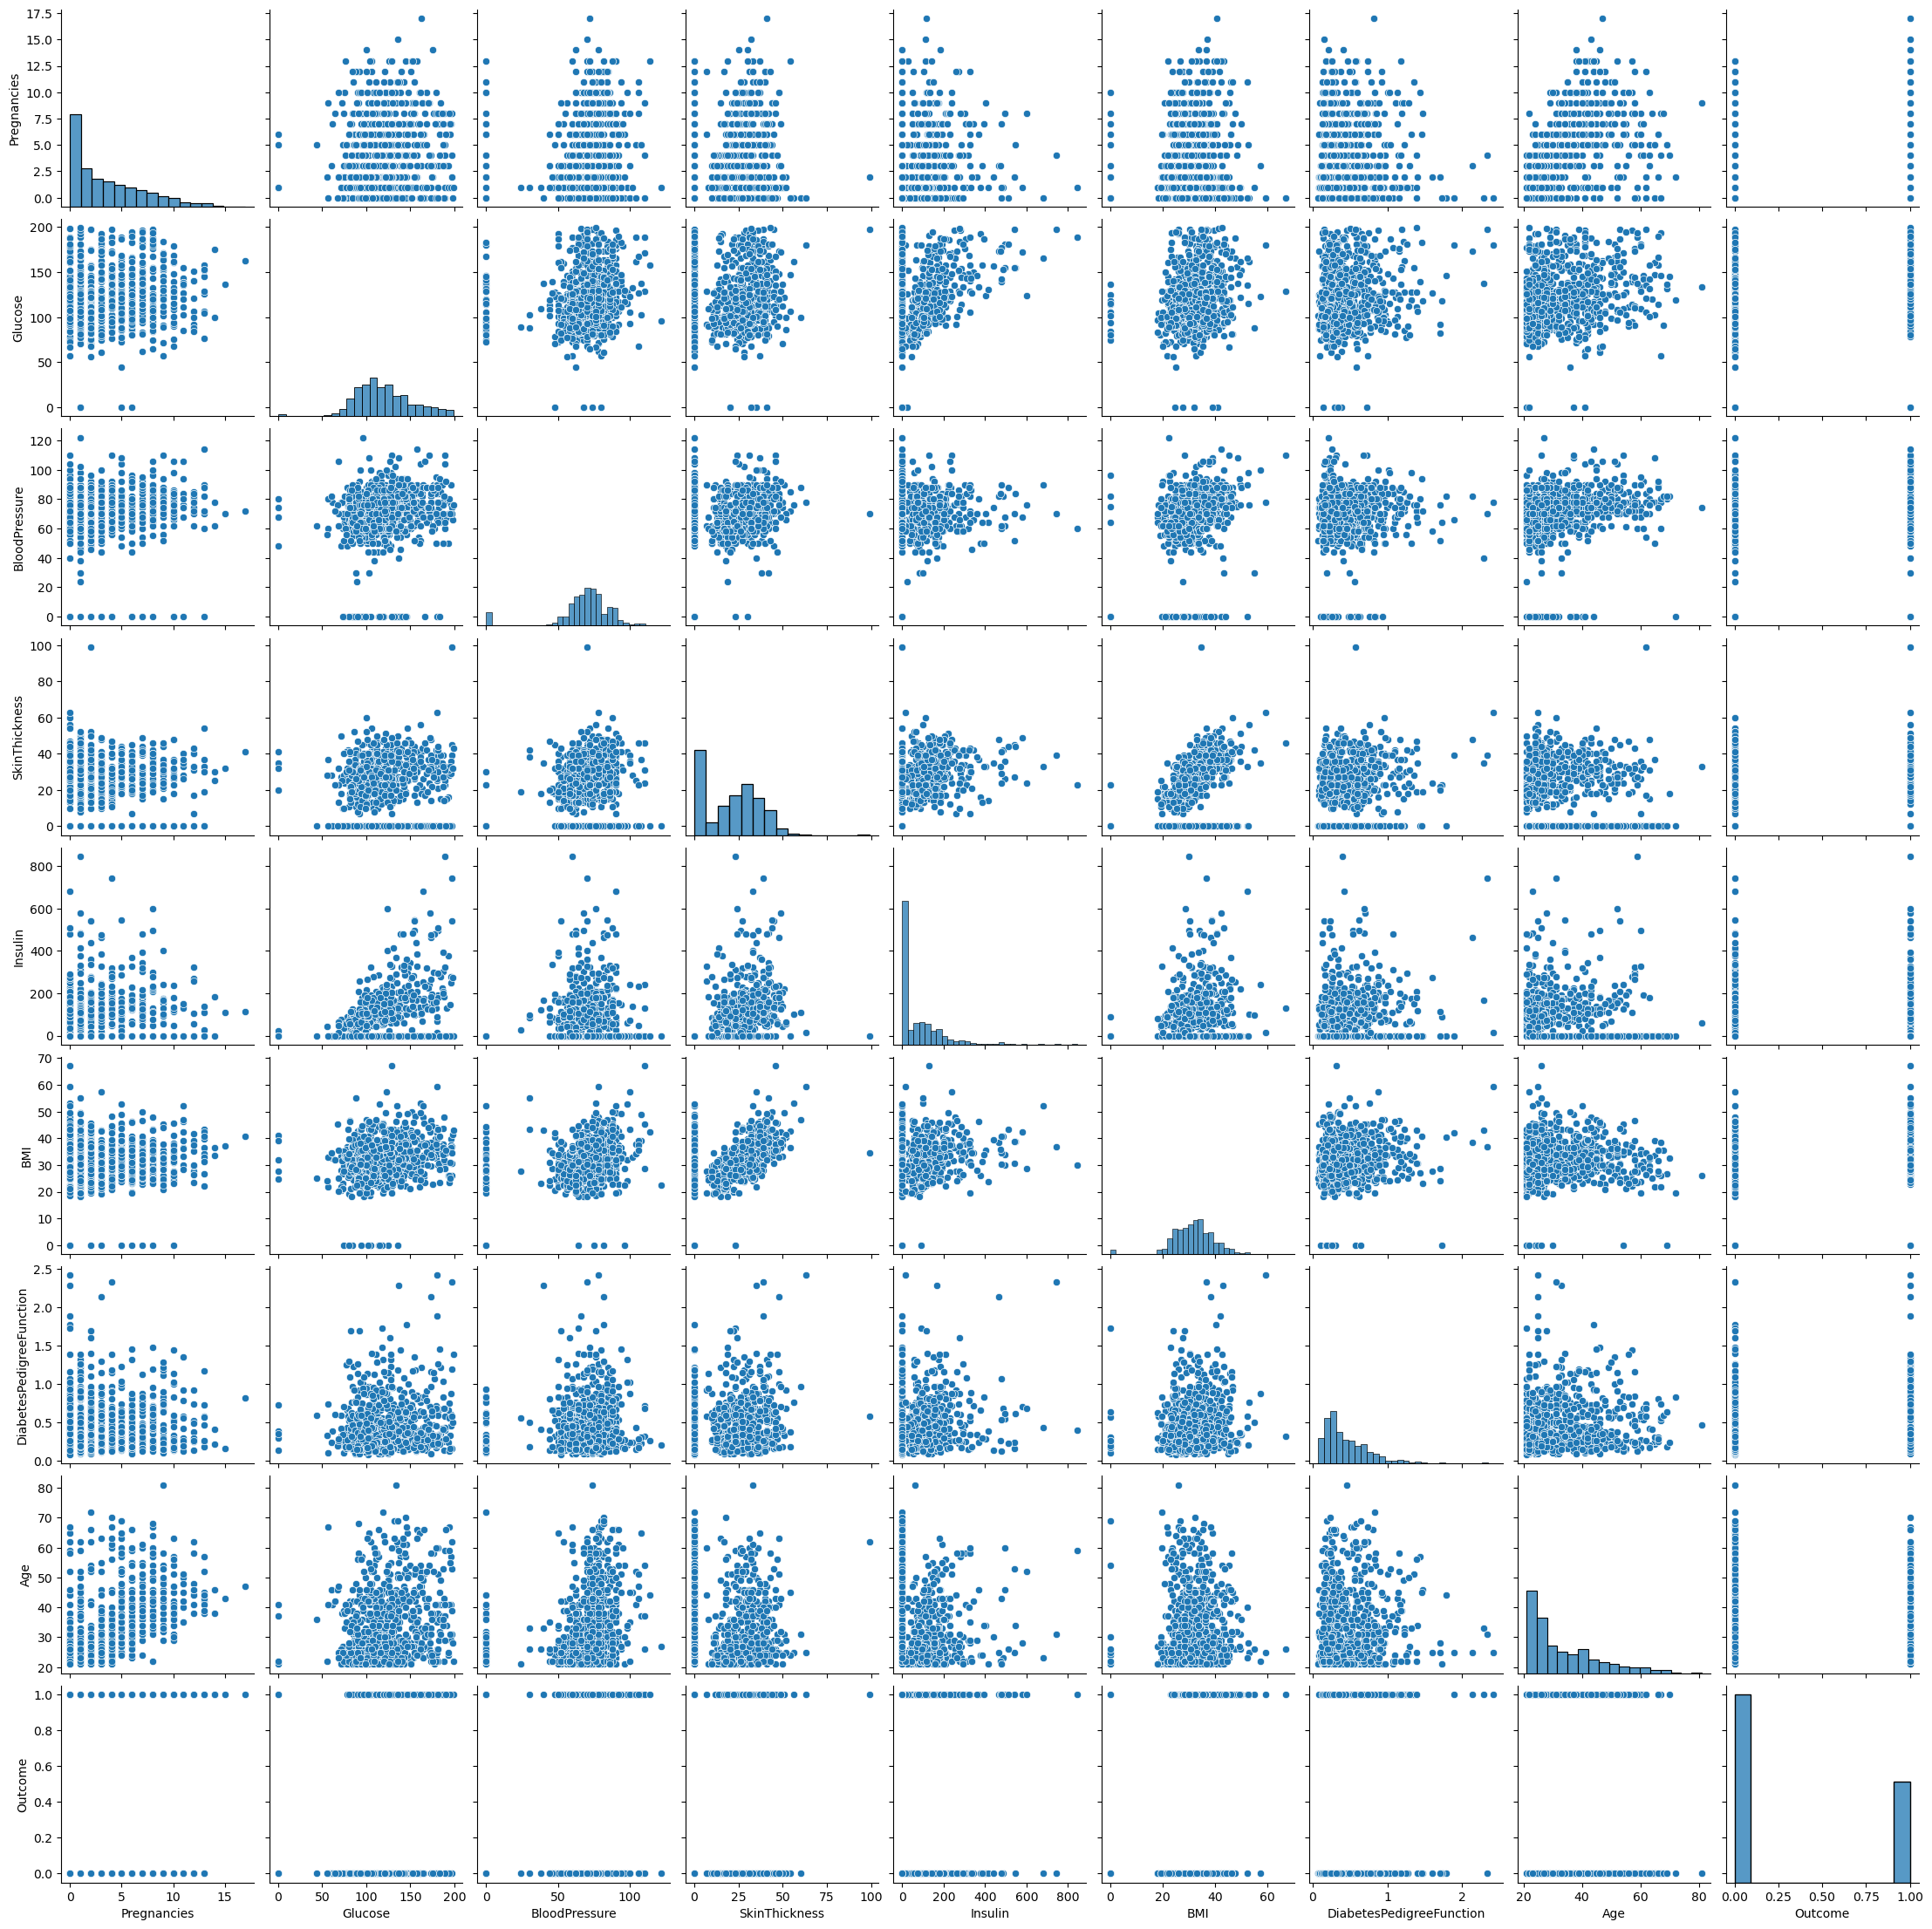

In [ ]:
sns.pairplot(data)

The `sns.pairplot` function will automatically create a matrix of scatter plots, where each row and column represents a feature, and the cells display the scatter plots between those features. It also includes histograms on the diagonal, showing the distribution of each individual feature.

Note that if you have a large number of features, generating scatter plots for all combinations might result in a large, cluttered plot. In such cases, you may want to consider plotting only a subset of features or using different visualization techniques.

For the previous case of histograms, we could also have made it with seaborn:

<Axes: >

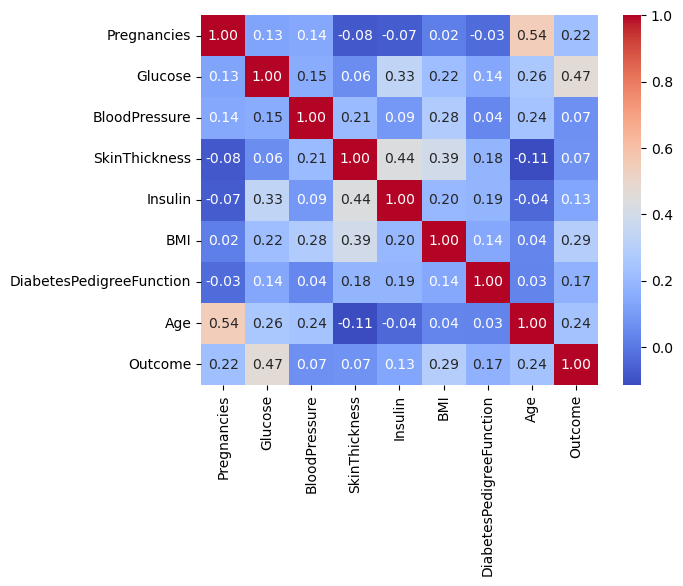

In [45]:
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')

In the above code, the `heatmap` function generates a color-coded matrix where the color intensity represents the correlation strength between two features. The `annot=Tru` argument adds the correlation coefficients to the plot, and `fmt='.2f'` formats the correlation values to two decimal places.

The color map `'coolwarm'` is used here, but you can choose a different color map according to your preference. Seaborn provides various built-in color maps, and you can find the list of available color maps in the seaborn documentation.

Please note that the correlation plot will only make sense if the features are numerical. If you have non-numeric or categorical features, you might need to perform additional preprocessing or use other visualization techniques suitable for categorical data. This is something we have talked about in [our previous notebook](https://github.com/Data-Centric-AI-Community/awesome-python-for-data-science/blob/main/tutorials/data_descriptive_statistics.ipynb).

# What is Next?

**Data Preparation!** Now that you know two ways to learn more about your data, you are ready to start manipulating it. In the next tutorial you will discover how you can prepare your data to best expose the structure of your problem to modeling algorithms.

### 👾 Join our [Discord community](https://tiny.ydata.ai/dcai-community-github) and follow our Code-with-Me sessions to learn more about data science!